 # Data Description



In this project, we are going to predict the probability [0, 1] of a binary target column.

The data contains binary features (bin_*), nominal features (nom_*), ordinal features (ord_*) as well as (potentially cyclical) day (of the week) and month features. The string ordinal features ord_{3-5} are lexically ordered according to string.ascii_letters.

Dataset Link :
[Here](https://www.kaggle.com/c/cat-in-the-dat-ii/data)


## Load Required Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Read Data

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,...,02e7c8990,3.0,Contributor,Hot,c,U,Pw,6.0,3.0,0
1,1,1.0,1.0,0.0,F,Y,Red,Star,Axolotl,NaN,...,f37df64af,3.0,Grandmaster,Warm,e,X,pE,7.0,7.0,0
2,2,0.0,1.0,0.0,F,N,Red,NaN,Hamster,Canada,...,NaN,3.0,NaN,Freezing,n,P,eN,5.0,9.0,0
3,3,NaN,0.0,0.0,F,N,Red,Circle,Hamster,Finland,...,f9d456e57,1.0,Novice,Lava Hot,a,C,NaN,3.0,3.0,0
4,4,0.0,NaN,0.0,T,N,Red,Triangle,Hamster,Costa Rica,...,c5361037c,3.0,Grandmaster,Cold,h,C,OZ,5.0,12.0,0


In [4]:
df_test.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
0,600000,0.0,0.0,0.0,F,Y,Blue,Polygon,Axolotl,Finland,...,ca9ad1d4b,fced9e114,3.0,Novice,Boiling Hot,f,U,oU,3.0,9.0
1,600001,0.0,0.0,0.0,F,Y,Red,Circle,Lion,Russia,...,060a21580,7ca8775da,1.0,Novice,Cold,n,N,NaN,2.0,8.0
2,600002,0.0,0.0,0.0,F,Y,Blue,Circle,Axolotl,Russia,...,165e81a00,5940334c9,1.0,Expert,Warm,i,N,DN,2.0,6.0
3,600003,1.0,0.0,0.0,F,N,Red,Polygon,Axolotl,Costa Rica,...,77d41330d,6fbdeefc8,1.0,Expert,Hot,m,B,AG,1.0,6.0
4,600004,0.0,0.0,1.0,F,Y,Red,Circle,NaN,Finland,...,2218d9dfe,2a27c8fde,1.0,Contributor,Lava Hot,o,J,DT,3.0,3.0


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 25 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      600000 non-null  int64  
 1   bin_0   582106 non-null  float64
 2   bin_1   581997 non-null  float64
 3   bin_2   582070 non-null  float64
 4   bin_3   581986 non-null  object 
 5   bin_4   581953 non-null  object 
 6   nom_0   581748 non-null  object 
 7   nom_1   581844 non-null  object 
 8   nom_2   581965 non-null  object 
 9   nom_3   581879 non-null  object 
 10  nom_4   581965 non-null  object 
 11  nom_5   582222 non-null  object 
 12  nom_6   581869 non-null  object 
 13  nom_7   581997 non-null  object 
 14  nom_8   582245 non-null  object 
 15  nom_9   581927 non-null  object 
 16  ord_0   581712 non-null  float64
 17  ord_1   581959 non-null  object 
 18  ord_2   581925 non-null  object 
 19  ord_3   582084 non-null  object 
 20  ord_4   582070 non-null  object 
 21  ord_5   58

In [6]:
df_train.describe()

,id,bin_0,bin_1,bin_2,ord_0,day,month,target
count,600000.000000,582106.000000,581997.000000,582070.000000,581712.000000,582048.000000,582012.000000,600000.000000
mean,299999.500000,0.092301,0.185532,0.278704,1.948224,4.112767,6.371317,0.187205
std,173205.225094,0.289451,0.388729,0.448362,0.853904,2.034430,3.458959,0.390076
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,149999.750000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,0.000000
50%,299999.500000,0.000000,0.000000,0.000000,2.000000,5.000000,6.000000,0.000000
75%,449999.250000,0.000000,0.000000,1.000000,3.000000,6.000000,8.000000,0.000000
max,599999.000000,1.000000,1.000000,1.000000,3.000000,7.000000,12.000000,1.000000


## Checking null values

In [7]:
df_train.isna().sum()

id            0
bin_0     17894
bin_1     18003
bin_2     17930
bin_3     18014
bin_4     18047
nom_0     18252
nom_1     18156
nom_2     18035
nom_3     18121
nom_4     18035
nom_5     17778
nom_6     18131
nom_7     18003
nom_8     17755
nom_9     18073
ord_0     18288
ord_1     18041
ord_2     18075
ord_3     17916
ord_4     17930
ord_5     17713
day       17952
month     17988
target        0
dtype: int64

In [8]:
df_test.isna().sum()

id           0
bin_0    11901
bin_1    12038
bin_2    11972
bin_3    11951
bin_4    11951
nom_0    12062
nom_1    11947
nom_2    12179
nom_3    12176
nom_4    11993
nom_5    11912
nom_6    12012
nom_7    12003
nom_8    11956
nom_9    12060
ord_0    11893
ord_1    12167
ord_2    12105
ord_3    12053
ord_4    11933
ord_5    12047
day      12025
month    11984
dtype: int64

## Change boolean value to int so as to encode

In [9]:
df_train['bin_3'] = df_train['bin_3'].apply(lambda x: 1 if x=='T' else 0)
df_train['bin_4'] = df_train['bin_4'].apply(lambda x:1 if x =='Y' else 0)
df_test['bin_3'] = df_test['bin_3'].apply(lambda x:1 if x=='T' else 0)
df_test['bin_4'] = df_test['bin_4'].apply(lambda x:1 if x == 'Y' else 0)

## Replace Null values

In [10]:
def replace_nan(data):
    for column in data.columns:
        if data[column].isna().sum() > 0:
            data[column] = data[column].fillna(data[column].mode()[0])


replace_nan(df_train)
replace_nan(df_test)

In [11]:
df_train

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0.0,0.0,0.0,0,0,Red,Trapezoid,Hamster,Russia,...,02e7c8990,3.0,Contributor,Hot,c,U,Pw,6.0,3.0,0
1,1,1.0,1.0,0.0,0,1,Red,Star,Axolotl,India,...,f37df64af,3.0,Grandmaster,Warm,e,X,pE,7.0,7.0,0
2,2,0.0,1.0,0.0,0,0,Red,Triangle,Hamster,Canada,...,8f3276a6e,3.0,Novice,Freezing,n,P,eN,5.0,9.0,0
3,3,0.0,0.0,0.0,0,0,Red,Circle,Hamster,Finland,...,f9d456e57,1.0,Novice,Lava Hot,a,C,Fl,3.0,3.0,0
4,4,0.0,0.0,0.0,1,0,Red,Triangle,Hamster,Costa Rica,...,c5361037c,3.0,Grandmaster,Cold,h,C,OZ,5.0,12.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,599995,0.0,1.0,0.0,1,0,Red,Polygon,Axolotl,India,...,015c63324,3.0,Novice,Freezing,a,R,GZ,5.0,8.0,0
599996,599996,1.0,0.0,0.0,1,1,Blue,Polygon,Dog,Costa Rica,...,a02ae6a63,2.0,Novice,Boiling Hot,n,N,sf,3.0,3.0,0
599997,599997,0.0,0.0,0.0,0,1,Red,Circle,Axolotl,Russia,...,40f9610c1,2.0,Contributor,Freezing,n,H,MV,7.0,5.0,0
599998,599998,1.0,1.0,0.0,0,1,Red,Polygon,Axolotl,India,...,c1a8374a0,1.0,Master,Warm,m,X,Ey,1.0,5.0,0


In [12]:
features = []

for col in df_train.columns[:-1]:
    rd = LabelEncoder()
    rd.fit_transform( df_train[col].append( df_test[col] ) )
    df_train[col] = rd.transform( df_train[col] )
    df_test [col] = rd.transform( df_test [col] )
    features.append(col)

In [13]:
df_train.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,0,0,2,4,3,5,...,27,2,0,3,2,20,56,5,2,0
1,1,1,1,0,0,1,2,3,0,4,...,2112,2,2,5,4,23,150,6,6,0
2,2,0,1,0,0,0,2,5,3,0,...,1270,2,4,2,13,15,105,4,8,0
3,3,0,0,0,0,0,2,0,3,3,...,2167,0,4,4,0,2,21,2,2,0
4,4,0,0,0,1,0,2,5,3,2,...,1747,2,2,1,7,2,50,4,11,0


In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 25 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   id      600000 non-null  int64
 1   bin_0   600000 non-null  int64
 2   bin_1   600000 non-null  int64
 3   bin_2   600000 non-null  int64
 4   bin_3   600000 non-null  int64
 5   bin_4   600000 non-null  int64
 6   nom_0   600000 non-null  int64
 7   nom_1   600000 non-null  int64
 8   nom_2   600000 non-null  int64
 9   nom_3   600000 non-null  int64
 10  nom_4   600000 non-null  int64
 11  nom_5   600000 non-null  int64
 12  nom_6   600000 non-null  int64
 13  nom_7   600000 non-null  int64
 14  nom_8   600000 non-null  int64
 15  nom_9   600000 non-null  int64
 16  ord_0   600000 non-null  int64
 17  ord_1   600000 non-null  int64
 18  ord_2   600000 non-null  int64
 19  ord_3   600000 non-null  int64
 20  ord_4   600000 non-null  int64
 21  ord_5   600000 non-null  int64
 22  day     600000 non-n

# Checking Accuracy before handling cyclic features

## Split into train and test sets

In [15]:
X = df_train.drop('target', axis=1)
y = df_train['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(480000, 24)
(120000, 24)
(480000,)
(120000,)


## Feature Scaling

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[ 0.47103166, -0.31337223, -0.46846177, ..., -0.26767892,
        -1.03333802, -0.99969011],
       [-0.05135935, -0.31337223, -0.46846177, ...,  1.2208917 ,
        -1.53020233, -0.41483695],
       [-1.13532806, -0.31337223, -0.46846177, ..., -0.8057165 ,
        -0.53647371, -0.99969011],
       ...,
       [-1.05040914, -0.31337223,  2.13464592, ...,  1.11328418,
        -1.53020233, -0.12241037],
       [ 0.78440393,  3.19109327,  2.13464592, ...,  0.44970451,
         0.45725491, -0.12241037],
       [ 0.03335177, -0.31337223, -0.46846177, ...,  0.82633081,
         0.45725491,  0.1700162 ]])

## Apply Random Forest Classifier

In [18]:
forest = RandomForestClassifier(random_state = 0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [19]:
y_pred = forest.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[97035   706]
 [21208  1051]]


0.8173833333333334

Confussion Matrix: 
[[97035   706]
 [21208  1051]]



<AxesSubplot:>

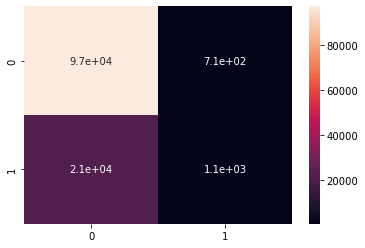

In [20]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confussion Matrix: \n{conf_matrix}\n')
sns.heatmap(conf_matrix, annot=True)

<span style="color: #0087e4; font-family: Segoe UI; font-size: 2.1em; font-weight: 200;">Performance Measures</span>

In [21]:
tn = conf_matrix[0,0]
fp = conf_matrix[0,1]
tp = conf_matrix[1,1]
fn = conf_matrix[1,0]

total = tn + fp + tp + fn
real_positive = tp + fn
real_negative = tn + fp

In [22]:
accuracy  = (tp + tn) / total # Accuracy Rate
precision = tp / (tp + fp) # Positive Predictive Value
recall    = tp / (tp + fn) # True Positive Rate
f1score  = 2 * precision * recall / (precision + recall)
specificity = tn / (tn + fp) # True Negative Rate
error_rate = (fp + fn) / total # Missclassification Rate
prevalence = real_positive / total
miss_rate = fn / real_positive # False Negative Rate
fall_out = fp / real_negative # False Positive Rate

print(f'Accuracy    : {accuracy}')
print(f'Precision   : {precision}')
print(f'Recall      : {recall}')
print(f'F1 score    : {f1score}')
print(f'Specificity : {specificity}')
print(f'Error Rate  : {error_rate}')
print(f'Prevalence  : {prevalence}')
print(f'Miss Rate   : {miss_rate}')
print(f'Fall Out    : {fall_out}')

Accuracy    : 0.8173833333333334
Precision   : 0.5981787137165623
Recall      : 0.04721685610314929
F1 score    : 0.08752498334443705
Specificity : 0.992776828557105
Error Rate  : 0.18261666666666668
Prevalence  : 0.18549166666666667
Miss Rate   : 0.9527831438968507
Fall Out    : 0.007223171442894998


<span style="color: #0087e4; font-family: Segoe UI; font-size: 2.1em; font-weight: 200;">Classification Report</span>

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.99      0.82      0.90    118243
           1       0.05      0.60      0.09      1757

    accuracy                           0.82    120000
   macro avg       0.52      0.71      0.49    120000
weighted avg       0.98      0.82      0.89    120000



# Checking Accuracy after handling cyclic feature
- Here month and day are cyclic

In [24]:
df_train.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,0,0,2,4,3,5,...,27,2,0,3,2,20,56,5,2,0
1,1,1,1,0,0,1,2,3,0,4,...,2112,2,2,5,4,23,150,6,6,0
2,2,0,1,0,0,0,2,5,3,0,...,1270,2,4,2,13,15,105,4,8,0
3,3,0,0,0,0,0,2,0,3,3,...,2167,0,4,4,0,2,21,2,2,0
4,4,0,0,0,1,0,2,5,3,2,...,1747,2,2,1,7,2,50,4,11,0


In [25]:
df_test.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
0,600000,0,0,0,0,1,0,1,0,3,...,174,2196,2,4,0,5,20,146,2,8
1,600001,0,0,0,0,1,2,0,4,5,...,4,1107,0,4,1,13,13,21,1,7
2,600002,0,0,0,0,1,0,0,0,5,...,16,812,0,1,5,8,13,12,1,5
3,600003,1,0,0,0,0,2,1,0,2,...,107,996,0,1,3,12,1,0,0,5
4,600004,0,0,1,0,1,2,0,3,3,...,30,371,0,0,4,14,9,14,2,2


In [26]:
df_train["day"] = df_train["day"]+1
df_train["month"] = df_train["month"]+1

df_test["day"] = df_test["day"]+1
df_test["month"] = df_test["month"]+1

In [27]:
print("Train:")
print('Unique values of month:',df_train.month.unique())
print('Unique values of day:',df_train.day.unique())
print("Test:")
print('Unique values of month:',df_test.month.unique())
print('Unique values of day:',df_test.day.unique())

Train:
Unique values of month: [ 3  7  9 12  4  6  1  8  5 11 10  2]
Unique values of day: [6 7 5 3 1 2 4]
Test:
Unique values of month: [ 9  8  6  3  5  2  7 11  1 12  4 10]
Unique values of day: [3 2 1 5 7 6 4]


In [28]:
df_train['day_sin'] = np.sin(df_train.day*(2.*np.pi/7))
df_train['day_cos'] = np.cos(df_train.day*(2.*np.pi/7))
df_train['month_sin'] = np.sin((df_train.month-1)*(2.*np.pi/12))
df_train['month_cos'] = np.cos((df_train.month-1)*(2.*np.pi/12))

df_test['day_sin'] = np.sin(df_test.day*(2.*np.pi/7))
df_test['day_cos'] = np.cos(df_test.day*(2.*np.pi/7))
df_test['month_sin'] = np.sin((df_test.month-1)*(2.*np.pi/12))
df_test['month_cos'] = np.cos((df_test.month-1)*(2.*np.pi/12))

**The logic**

We map each cyclical variable onto a circle such that the lowest value for that variable appears right next to the largest value. We compute the x- and y- component of that point using sin and cos trigonometric functions.

For handling month we consider them from 0-11 and refer the below figure.

<img src="https://i.ibb.co/hF8yWhT/cyclic.png">

In [29]:
df_train.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,ord_3,ord_4,ord_5,day,month,target,day_sin,day_cos,month_sin,month_cos
0,0,0,0,0,0,0,2,4,3,5,...,2,20,56,6,3,0,-7.818315e-01,0.623490,8.660254e-01,0.500000
1,1,1,1,0,0,1,2,3,0,4,...,4,23,150,7,7,0,-2.449294e-16,1.000000,1.224647e-16,-1.000000
2,2,0,1,0,0,0,2,5,3,0,...,13,15,105,5,9,0,-9.749279e-01,-0.222521,-8.660254e-01,-0.500000
3,3,0,0,0,0,0,2,0,3,3,...,0,2,21,3,3,0,4.338837e-01,-0.900969,8.660254e-01,0.500000
4,4,0,0,0,1,0,2,5,3,2,...,7,2,50,5,12,0,-9.749279e-01,-0.222521,-5.000000e-01,0.866025


In [30]:
df_test.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,ord_2,ord_3,ord_4,ord_5,day,month,day_sin,day_cos,month_sin,month_cos
0,600000,0,0,0,0,1,0,1,0,3,...,0,5,20,146,3,9,0.433884,-0.900969,-0.866025,-0.500000
1,600001,0,0,0,0,1,2,0,4,5,...,1,13,13,21,2,8,0.974928,-0.222521,-0.500000,-0.866025
2,600002,0,0,0,0,1,0,0,0,5,...,5,8,13,12,2,6,0.974928,-0.222521,0.500000,-0.866025
3,600003,1,0,0,0,0,2,1,0,2,...,3,12,1,0,1,6,0.781831,0.623490,0.500000,-0.866025
4,600004,0,0,1,0,1,2,0,3,3,...,4,14,9,14,3,3,0.433884,-0.900969,0.866025,0.500000


## Split into train and test sets

In [31]:
X = df_train.drop(['target','day','month'], axis=1)
y = df_train['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [32]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(480000, 26)
(120000, 26)
(480000,)
(120000,)


In [33]:
X_train.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day_sin,day_cos,month_sin,month_cos
381538,381538,0,0,0,0,1,2,1,3,4,...,1,0,1,2,25,74,0.974928,-0.222521,0.866025,0.500000
291035,291035,0,0,0,0,0,0,1,1,3,...,0,3,4,4,10,157,0.781831,0.623490,0.866025,-0.500000
103240,103240,0,0,0,1,1,2,3,3,5,...,2,3,5,12,12,44,0.433884,-0.900969,0.866025,0.500000
60225,60225,0,0,0,0,1,0,4,0,5,...,2,0,5,3,8,71,0.974928,-0.222521,0.866025,0.500000
162729,162729,0,1,1,1,0,0,4,4,2,...,1,4,2,1,23,96,0.974928,-0.222521,-0.500000,-0.866025


## Feature Scaling

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[ 0.47103166, -0.31337223, -0.46846177, ..., -0.36851701,
         1.27028211,  0.70650649],
       [-0.05135935, -0.31337223, -0.46846177, ...,  0.84489032,
         1.27028211, -0.5895808 ],
       [-1.13532806, -0.31337223, -0.46846177, ..., -1.34159414,
         1.27028211,  0.70650649],
       ...,
       [-1.05040914, -0.31337223,  2.13464592, ...,  0.84489032,
         0.69050529, -1.06398168],
       [ 0.78440393,  3.19109327,  2.13464592, ..., -0.36851701,
         0.69050529, -1.06398168],
       [ 0.03335177, -0.31337223, -0.46846177, ..., -0.36851701,
        -0.10148457, -1.23762445]])

## Apply Random Forest Classifier

In [35]:
forest = RandomForestClassifier(random_state = 0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [36]:
y_pred = forest.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[97015   726]
 [21283   976]]


0.8165916666666667

Confussion Matrix: 
[[97015   726]
 [21283   976]]



<AxesSubplot:>

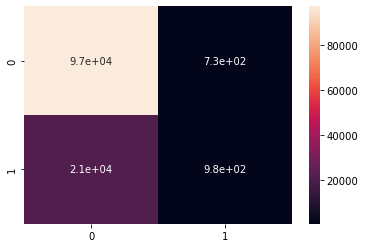

In [37]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confussion Matrix: \n{conf_matrix}\n')
sns.heatmap(conf_matrix, annot=True)

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.99      0.82      0.90    118298
           1       0.04      0.57      0.08      1702

    accuracy                           0.82    120000
   macro avg       0.52      0.70      0.49    120000
weighted avg       0.98      0.82      0.89    120000



<b>Accuracy decreased :/ </b>